In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [13]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=15)

In [14]:
X

array([[-2.04715027,  9.44085126,  7.53438648, ...,  9.45954623,
        -2.03200391, -0.11718929],
       [-3.67891135,  9.11679429,  8.03747629, ...,  7.62631047,
        -1.96779394,  0.32558307],
       [ 5.26381207, -2.18181646, -7.68052738, ...,  5.50167758,
         8.94233788,  8.10172631],
       ...,
       [ 3.06546249, -6.93798808, -4.86470519, ..., -7.09503116,
         0.62782929, 10.6626492 ],
       [-2.06966308,  9.67739436,  8.09730222, ...,  9.75961489,
        -4.14530819,  1.12055878],
       [ 6.98214765, -8.51465291, -5.30202178, ..., -6.61063975,
         0.41315018,  9.96581457]], shape=(1000, 15))

### Applying PCA

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=43)
X_train

array([[  6.7443277 ,  -1.71033001,  -7.88478358, ...,   6.07503654,
          9.51907588,   9.05309343],
       [  5.58968146,   0.87304911,  -9.11685297, ...,   5.87647513,
          9.02947301,   9.25395228],
       [ -3.94243865,   8.97584214,   6.89354781, ...,   9.19669249,
         -2.64657269,   0.1572179 ],
       ...,
       [ -2.09654871,   9.24165684,  10.07784331, ...,   7.60075451,
         -2.8659705 ,   0.68185876],
       [  6.09338107,  -1.90114793, -10.07885605, ...,   6.75688077,
         11.68854899,   7.07813558],
       [ -1.5376759 ,   7.29303324,   5.80865329, ...,   7.70423239,
         -2.3434079 ,   0.01960784]], shape=(670, 15))

In [17]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [18]:
X_train_scaled

array([[ 0.99205015, -0.22517898, -0.72082394, ...,  0.50133299,
         1.22302288,  0.71450482],
       [ 0.67360727,  0.16192254, -0.88387218, ...,  0.47455085,
         1.1322696 ,  0.7616462 ],
       [-1.95528092,  1.37607009,  1.23489449, ...,  0.92238465,
        -1.03201397, -1.37334905],
       ...,
       [-1.44619814,  1.41590059,  1.65629426, ...,  0.70712315,
        -1.07268177, -1.25021632],
       [ 0.81252389, -0.25377172, -1.01118067, ...,  0.59330073,
         1.6251586 ,  0.25098401],
       [-1.29206515,  1.1239128 ,  1.09132293, ...,  0.72108034,
        -0.97581904, -1.40564601]], shape=(670, 15))

In [19]:

from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [20]:
X_train_scaled_pca=pca.fit_transform(X_train_scaled)
X_test_scaled_pca=pca.transform(X_test_scaled)



In [21]:
pca.explained_variance_

array([8.90665868, 4.95237257])

In [22]:
X_train_scaled_pca

array([[-2.52525094,  2.60847385],
       [-2.35456261,  2.56341194],
       [ 4.38777584,  0.28388792],
       ...,
       [ 4.32466465, -0.15135766],
       [-2.40694613,  2.40933495],
       [ 4.09885687,  0.3315965 ]], shape=(670, 2))

Text(0, 0.5, 'Second Principal Component')

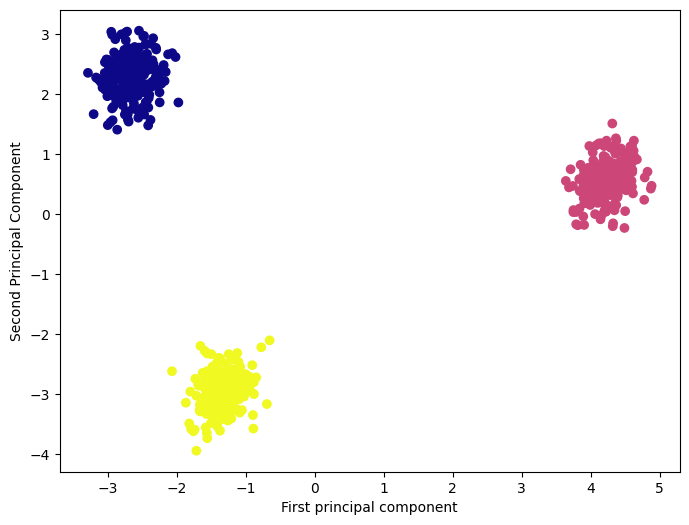

In [23]:

plt.figure(figsize=(8,6))
plt.scatter(X_train_scaled_pca[:,0],X_train_scaled_pca[:,1],cmap='plasma',c=y_train)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

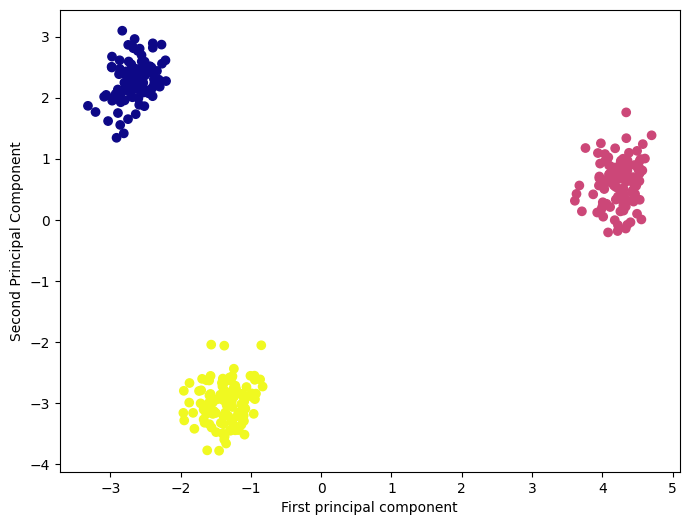

In [24]:

plt.figure(figsize=(8,6))
plt.scatter(X_test_scaled_pca[:,0],X_test_scaled_pca[:,1],cmap='plasma',c=y_test)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [26]:
from sklearn.cluster import KMeans

In [27]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled_pca)
    wcss.append(kmeans.inertia_)

In [28]:
wcss

[9271.69190547481,
 4883.41541481471,
 110.21311544621796,
 92.763698371911,
 76.29654669285009,
 72.68905583991493,
 56.9908981030528,
 51.631328996752174,
 46.877434983781626,
 41.61809091598446]

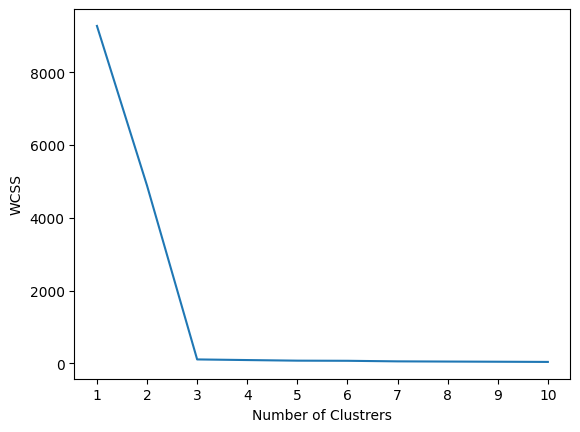

In [29]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [30]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [31]:
kmeans.fit_predict(X_train_scaled_pca)

array([2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 1,
       2, 2, 2, 0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1, 1,
       1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0, 1,
       1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 1, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2,

In [32]:
y_pred=kmeans.predict(X_test_scaled_pca)

In [33]:
y_pred

array([0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 0, 1, 1,
       0, 2, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0,
       1, 2, 2, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2,
       2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 2, 1,
       2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0,
       2, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1,
       0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1,
       2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1,

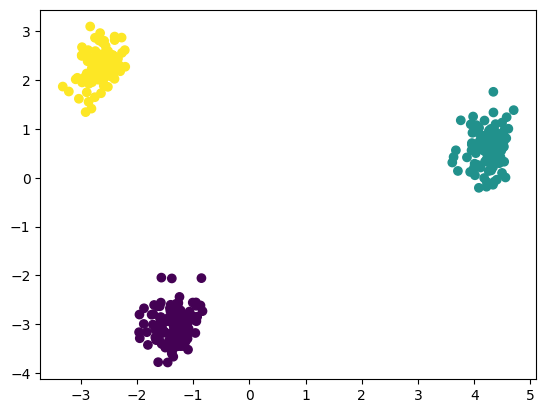

In [34]:
plt.scatter(X_test_scaled_pca[:,0],X_test_scaled_pca[:,1],c=y_pred)

In [84]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [23]:
## kneelocator
!pip install kneed

In [35]:
from kneed import KneeLocator

In [36]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [37]:
kl.elbow

np.int64(3)

In [38]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [39]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled_pca)
    score=silhouette_score(X_train_scaled_pca,kmeans.labels_)
    silhouette_coefficients.append(score)

In [40]:
silhouette_coefficients

[np.float64(0.6824092000938927),
 np.float64(0.9118025789768969),
 np.float64(0.7339134106225403),
 np.float64(0.5498261355097736),
 np.float64(0.5344896347500621),
 np.float64(0.3675685391781654),
 np.float64(0.3391755853262507),
 np.float64(0.34484005734013745),
 np.float64(0.334550194673049)]

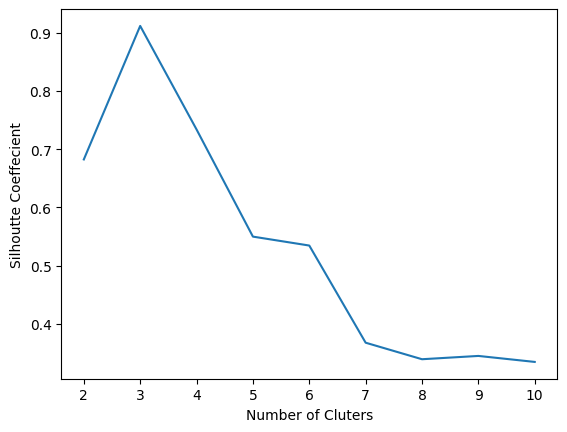

: 

In [ ]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()